In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV
df = pd.read_csv("../data/analysis_tables/most dangerous location per year.csv")

# Preview the data
print(df.head())
print(df.info())

                     location   2012   2013   2014   2015   2016   2017  \
0              alexanderplatz  19314  20167  20068  21809  21931  20861   
1        tempelhofer_vorstadt  12729  12191  12453  13597  13273  12385   
2  frankfurter_allee_south_fk  10117  11138  12420  13861  12256  10806   
3           schoeneberg-north   9883  10523  10347  11207  10810  11021   
4                   tempelhof   9211   9044   9569   9285   9808   9073   

    2018   2019  
0  19391  22810  
1  13082  13931  
2  10787  12519  
3  13495  10629  
4   9464  10218  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  169 non-null    object
 1   2012      169 non-null    int64 
 2   2013      169 non-null    int64 
 3   2014      169 non-null    int64 
 4   2015      169 non-null    int64 
 5   2016      169 non-null    int64 
 6   2017      169 non-null    in

In [2]:
year_cols = ["2012","2013","2014","2015","2016","2017","2018","2019"]

In [3]:
# Total crime per location across all years
df["total"] = df[year_cols].sum(axis=1)

# Keep only the TOP 5 locations
top5 = df.nlargest(5, "total")

In [4]:
df_melted = top5.melt(
    id_vars="location",
    value_vars=year_cols,
    var_name="year",
    value_name="crime_count"
)

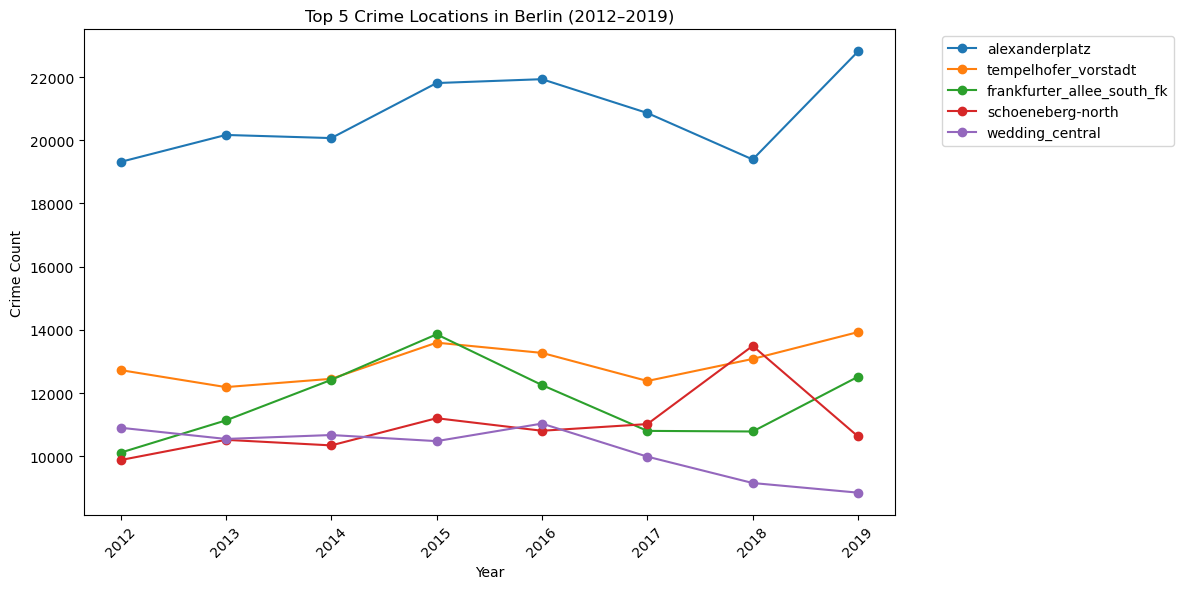

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for loc in df_melted["location"].unique():
    data = df_melted[df_melted["location"] == loc]
    plt.plot(data["year"], data["crime_count"], marker='o', label=loc)

plt.title("Top 5 Crime Locations in Berlin (2012–2019)")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image
plt.savefig("../figures/highest_crimes_top10_cities.png", dpi=300, bbox_inches='tight')
plt.show()